### Exploratory Data Analysis on Complete Data

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
DATA_PATH = "dataset"

In [9]:
distances = list(range(50, 350, 50))
data_folders = ["distance_"+str(d) for d in distances]

In [10]:
df_list = []
i = 0
for data_folder in data_folders:
    data_file = "data_"+str(i)+".csv"
    df = pd.read_csv(os.path.join(DATA_PATH, data_folder, data_file), index_col=None, header=0)
    i+=1
    df_list.append(df)

data = pd.concat(df_list, axis=0, ignore_index=True)

In [11]:
N = data.shape[0]

In [12]:
print(data.shape)

(19000, 5)


In [13]:
data.head(3)

,duration1,duration2,temperature,humidity,speedlevel
0,564,566,27.3,59.7,0.0
1,564,560,27.3,59.7,0.0
2,564,561,27.3,59.7,0.0


In [14]:
data.describe()

,duration1,duration2,temperature,humidity,speedlevel
count,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000
mean,577.709211,564.231632,27.365158,61.284747,10.131579
std,12.085029,8.640328,0.594145,3.106560,4.546061
min,563.000000,557.000000,26.300000,56.700000,0.000000
25%,567.000000,558.000000,26.800000,58.700000,7.500000
50%,573.000000,563.000000,27.300000,59.800000,9.500000
75%,591.000000,566.000000,27.900000,64.600000,13.850000
max,603.000000,593.000000,29.100000,67.200000,19.100000


## Target variable speedlevel

Text(0, 0.5, 'Velocity')

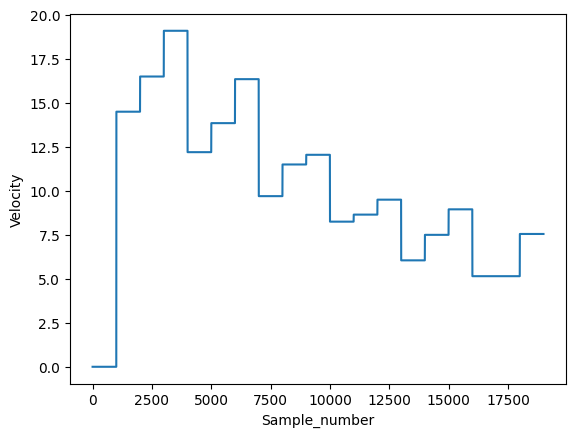

In [16]:
plt.plot(data["speedlevel"])
plt.xlabel("Sample_number")
plt.ylabel("Velocity")

## Temparature

Text(0, 0.5, 'Temperature')

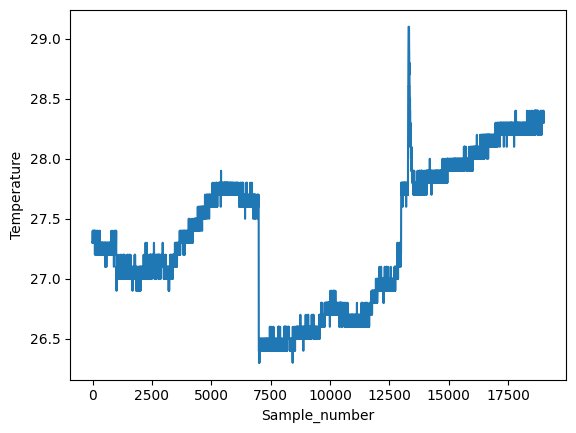

In [17]:
plt.plot(data["temperature"])
plt.xlabel("Sample_number")
plt.ylabel("Temperature")

## Humidity

Text(0, 0.5, 'Humidity')

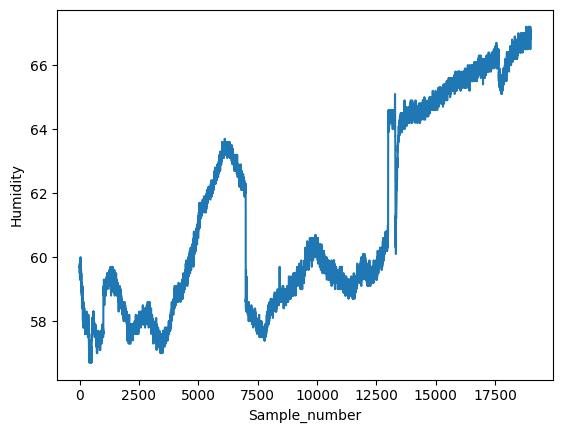

In [19]:
plt.plot(data["humidity"])
plt.xlabel("Sample_number")
plt.ylabel("Humidity")

## Correlation Table

In [20]:
data.corr(method='spearman')

,duration1,duration2,temperature,humidity,speedlevel
duration1,1.000000,-0.037483,-0.100159,-0.073633,0.290301
duration2,-0.037483,1.000000,-0.276022,-0.199811,0.048324
temperature,-0.100159,-0.276022,1.000000,0.777392,-0.399108
humidity,-0.073633,-0.199811,0.777392,1.000000,-0.479948
speedlevel,0.290301,0.048324,-0.399108,-0.479948,1.000000


Text(0, 0.5, 'duration1')

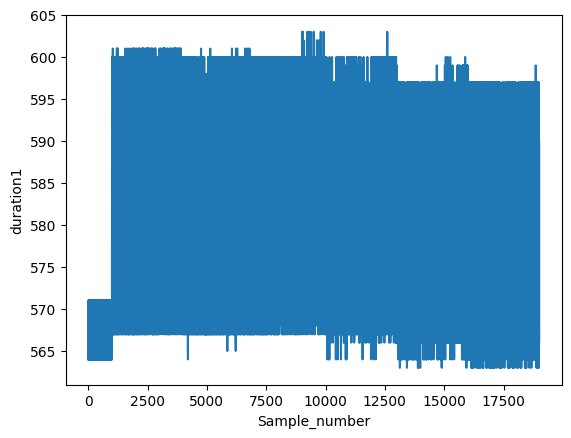

In [21]:
plt.plot(data["duration1"])
plt.xlabel("Sample_number")
plt.ylabel("duration1")

Text(0, 0.5, 'duration2')

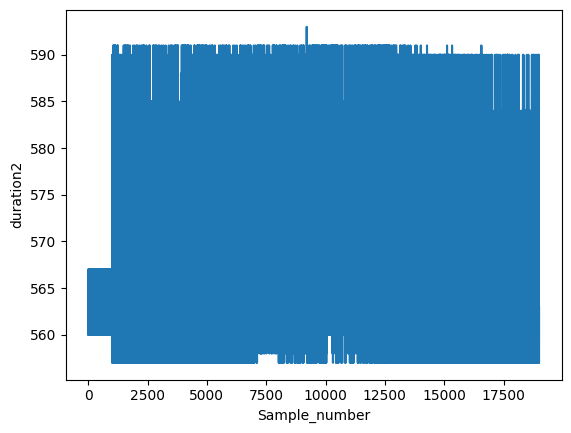

In [22]:
plt.plot(data["duration2"])
plt.xlabel("Sample_number")
plt.ylabel("duration2")

## Phase Shift Plots

In [23]:
def phase_plots(d1, d2, v, start, stop):
    plt.rcParams["figure.figsize"] = (12,4)
    plt.plot(indx[start:stop], d1[start:stop],c="b", label="duration1")
    plt.plot(indx[start:stop], d2[start:stop],c="k", label="duration2")
    plt.plot(indx[start:stop], v[start:stop],c="m", label="velocity")
    plt.xlabel("samples")
    plt.ylabel("duration")
    plt.legend()

In [31]:
d1 = data["duration1"]
d2 = data["duration2"]
v = data["speedlevel"]
indx = range(N)
start = 2000
stop = 25250

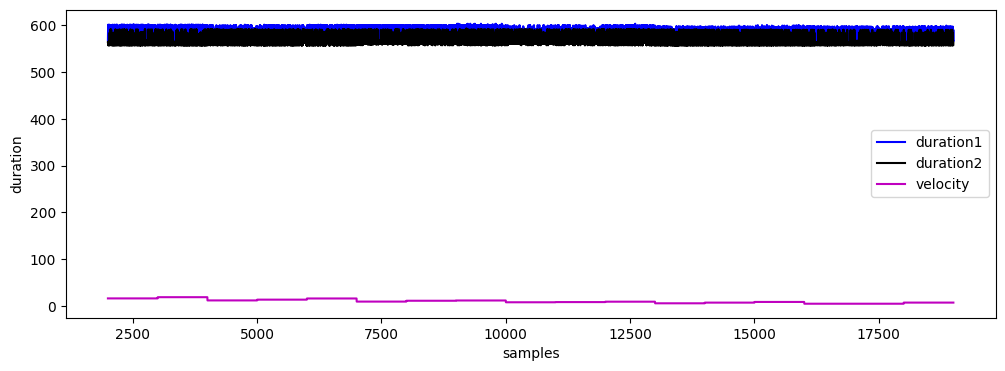

In [32]:
phase_plots(d1, d2, v, start, stop)

In [33]:
data["delta"] = data["duration1"]-data["duration2"]

In [35]:
durations = data[["duration1", "duration2", "delta", "speedlevel"]]
scaler = MinMaxScaler()
scaler.fit(durations)
dnorms = scaler.transform(durations)

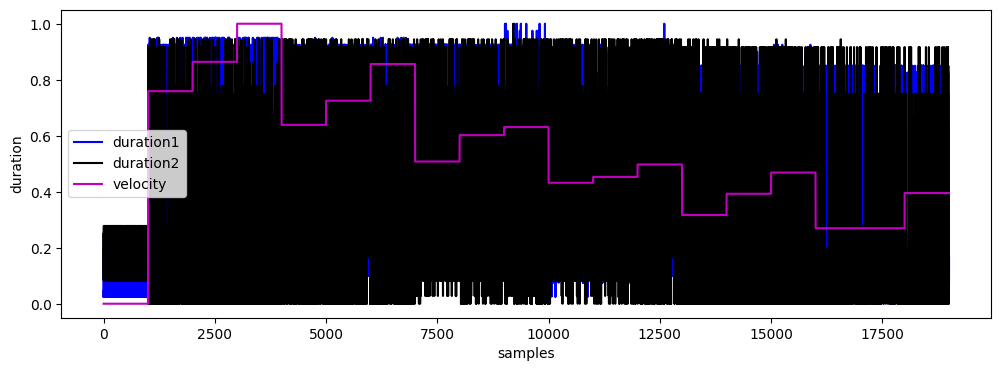

In [36]:
start = 0
stop = N
phase_plots(dnorms[:,0], dnorms[:,1], dnorms[:,3], start, stop)

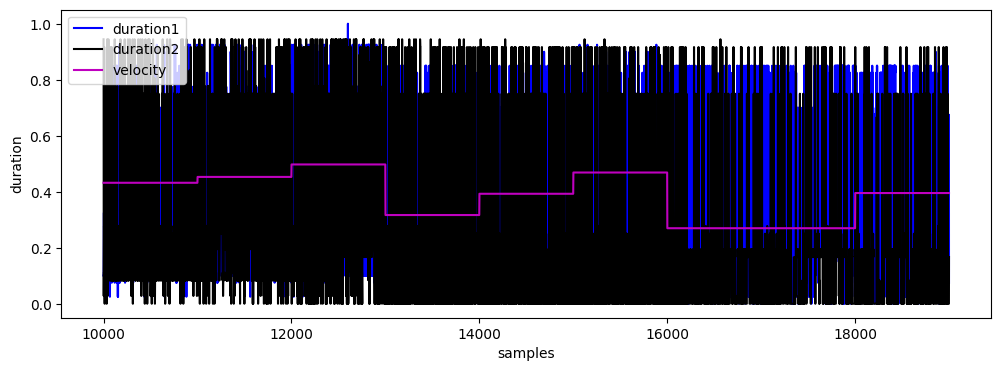

In [42]:
center = 25000
offset = 15000
start = center-offset
stop = center+offset
phase_plots(dnorms[:,0], dnorms[:,1], dnorms[:,3], start, stop)

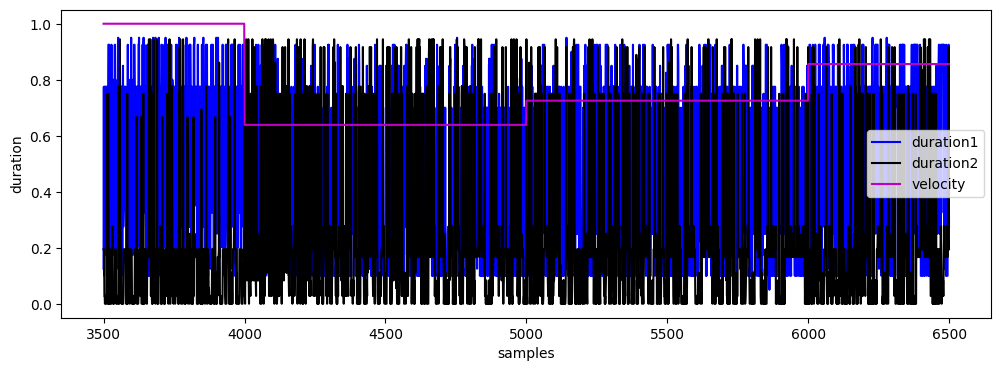

In [48]:
center = 5000
offset = 1500
start = center-offset
stop = center+offset
phase_plots(dnorms[:,0], dnorms[:,1], dnorms[:,3], start, stop)

In [49]:
data.corr(method='spearman')

,duration1,duration2,temperature,humidity,speedlevel,delta
duration1,1.000000,-0.037483,-0.100159,-0.073633,0.290301,0.791036
duration2,-0.037483,1.000000,-0.276022,-0.199811,0.048324,-0.566110
temperature,-0.100159,-0.276022,1.000000,0.777392,-0.399108,0.066608
humidity,-0.073633,-0.199811,0.777392,1.000000,-0.479948,0.043306
speedlevel,0.290301,0.048324,-0.399108,-0.479948,1.000000,0.175047
delta,0.791036,-0.566110,0.066608,0.043306,0.175047,1.000000


In [50]:
data["delta_avg"] = data["delta"].rolling(window=100).mean()

In [51]:
def feature_plot(feature, v, start, stop):
    plt.rcParams["figure.figsize"] = (12,4)
    plt.plot(indx[start:stop], feature[start:stop],c="k", label="delta_avg")
    plt.plot(indx[start:stop], v[start:stop],c="m", label="velocity")
    plt.xlabel("samples")
    plt.ylabel("feature and target")
    plt.legend()

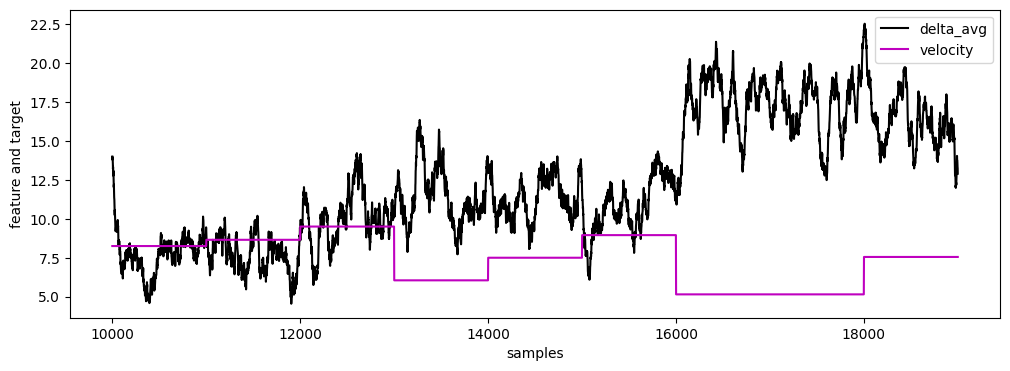

In [53]:
center = 25000
offset = 15000
start = center-offset
stop = center+offset
feature_plot(data["delta_avg"], v, start, stop)

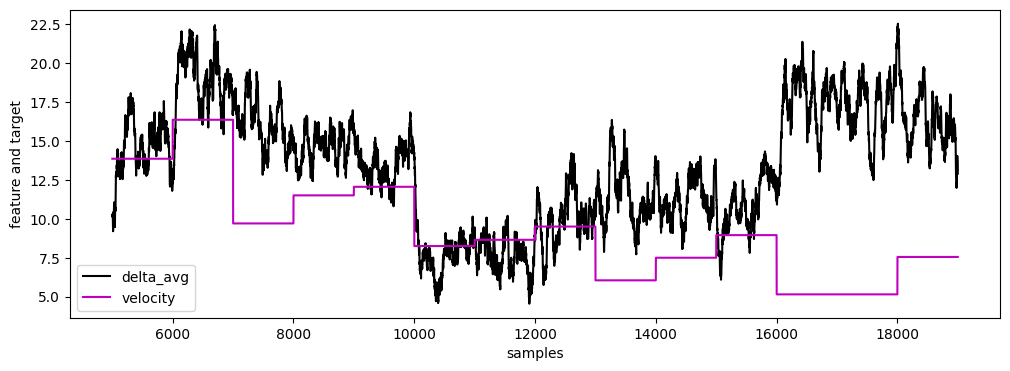

In [54]:
center = 50000
offset = 45000
start = center-offset
stop = center+offset
feature_plot(data["delta_avg"], v, start, stop)

In [56]:
data.to_csv("anemometer_data_full.csv")

In [57]:
data.head()

,duration1,duration2,temperature,humidity,speedlevel,delta,delta_avg
0,564,566,27.3,59.7,0.0,-2,NaN
1,564,560,27.3,59.7,0.0,4,NaN
2,564,561,27.3,59.7,0.0,3,NaN
3,570,560,27.3,59.7,0.0,10,NaN
4,571,567,27.4,59.7,0.0,4,NaN
